In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_graph(df, target_column='WAF'):
    df = df.copy()

    if target_column not in df.columns:
        raise ValueError(f"'{target_column}' 컬럼이 DataFrame에 존재하지 않습니다.")

    workloads = sorted(df['workload'].unique())
    configs = sorted(df['config'].unique())

    # 파스텔 색상 목록 (필요시 확장 가능)
    colors = ['skyblue', 'lightpink', 'lightgreen', 'plum', 'gold']

    # subplot 개수 설정
    n = len(workloads)
    fig, axs = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    if n == 1:
        axs = [axs]

    for i, workload in enumerate(workloads):
        ax = axs[i]
        subset = df[df['workload'] == workload]
        means = subset.groupby('config')[target_column].mean().reindex(configs)

        bars = ax.bar(configs, means, color=[colors[j % len(colors)] for j in range(len(configs))])
        ax.set_title(f'Workload: {workload}')
        ax.set_xlabel('Config')
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

        # 막대 위에 수치 표시
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                    ha='center', va='bottom', fontsize=9)

        if i == 0:
            ax.set_ylabel(target_column)

    plt.tight_layout()
    plt.show()

In [2]:
def plot_graph2(df):
    df = df.copy()

    # write와 관련된 컬럼들
    write_columns = [
        'rocksdb.flush.write.bytes', 
        'rocksdb.compact.write.bytes', 
        'rocksdb.bytes.written'
    ]
    
    workloads = sorted(df['workload'].unique())
    configs = sorted(df['config'].unique())

    # 파스텔 색상 목록 (필요시 확장 가능)
    colors = ['skyblue', 'lightpink', 'lightgreen', 'plum', 'gold']

    # subplot 개수 설정
    n = len(workloads)
    fig, axs = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    if n == 1:
        axs = [axs]

    for i, workload in enumerate(workloads):
        ax = axs[i]
        subset = df[df['workload'] == workload]
        
        # 각 write 컬럼에 대해 평균값을 계산하여 그리기
        means = subset[write_columns].groupby(df['config']).mean().reindex(configs)

        # 각 write 컬럼에 대해 막대그래프 그리기
        width = 0.2  # 막대의 너비
        x = range(len(configs))  # X축 위치
        bar_width = width * len(write_columns)  # 막대의 너비를 설정
        
        for j, column in enumerate(write_columns):
            ax.bar(
                [pos + j * width - bar_width/2 for pos in x],  # 막대의 위치 설정
                means[column], 
                width=width, 
                label=column,
                color=colors[j % len(colors)]
            )
        
        ax.set_title(f'Workload: {workload}')
        ax.set_xlabel('Config')
        ax.set_xticks(x)  # X축에 config명 표시
        ax.set_xticklabels(configs)  # 각 config에 대한 레이블 설정
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)
        ax.legend()

        if i == 0:
            ax.set_ylabel('Write Bytes')

    plt.tight_layout()
    plt.show()

In [3]:
import pandas as pd

df = pd.read_csv('modified_h1_output_2.csv')
df

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
0,fillrandom,leveled,perf,100000,1641700000,198908928,822552660,0,0,NaN,0.622197,227.390,4397.0,68.8
1,overwrite,fifo,stable,100000,1641700000,0,822842964,1641700000,100000,NaN,0.501214,168.393,5938.0,92.9
2,fillrandom,leveled,stable,100000,1641700000,197796352,822624340,1641700000,100000,NaN,0.621563,220.143,4542.0,71.0
3,fillrandom,fifo,perf,100000,1641700000,0,821753428,0,0,NaN,0.500550,140.064,7139.0,111.7
4,fillrandom,universal,stable,100000,1641700000,328594432,858172126,1641700000,100000,NaN,0.722889,317.959,3145.0,49.2
5,overwrite,universal,stable,100000,1641700000,314506240,858797790,1641700000,100000,NaN,0.714688,277.565,3602.0,56.3
6,overwrite,fifo,perf,100000,1641700000,0,822334036,0,0,NaN,0.500904,144.786,6906.0,108.0
7,readwhilewriting,fifo,stable,3416,56080472,0,0,56080472,3416,NaN,0.000000,1.096,3645510.0,866.0
8,fillrandom,universal,perf,100000,1641700000,334981632,858725086,0,0,NaN,0.727116,319.701,3127.0,48.9
9,readwhilewriting,universal,stable,3625,59511625,0,0,59511625,3625,NaN,0.000000,1.120,3564808.0,889.8


## Universal

In [4]:
universal = df[df['compaction_style'] == 'universal']
universal

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
4,fillrandom,universal,stable,100000,1641700000,328594432,858172126,1641700000,100000,NaN,0.722889,317.959,3145.0,49.2
5,overwrite,universal,stable,100000,1641700000,314506240,858797790,1641700000,100000,NaN,0.714688,277.565,3602.0,56.3
8,fillrandom,universal,perf,100000,1641700000,334981632,858725086,0,0,NaN,0.727116,319.701,3127.0,48.9
9,readwhilewriting,universal,stable,3625,59511625,0,0,59511625,3625,NaN,0.000000,1.120,3564808.0,889.8
10,overwrite,universal,perf,100000,1641700000,357729792,858651358,0,0,NaN,0.740928,304.172,3287.0,51.4
11,readwhilewriting,universal,perf,8035,131910595,0,35656325,0,0,NaN,0.270307,1.634,382100.0,242.6


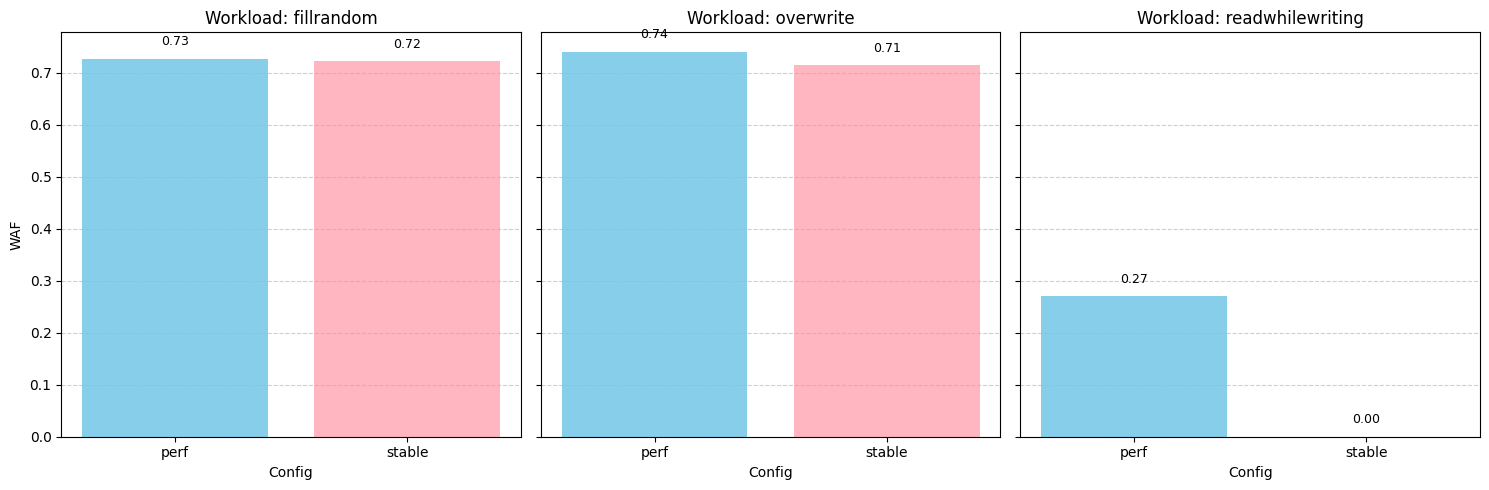

In [5]:
plot_graph(universal)

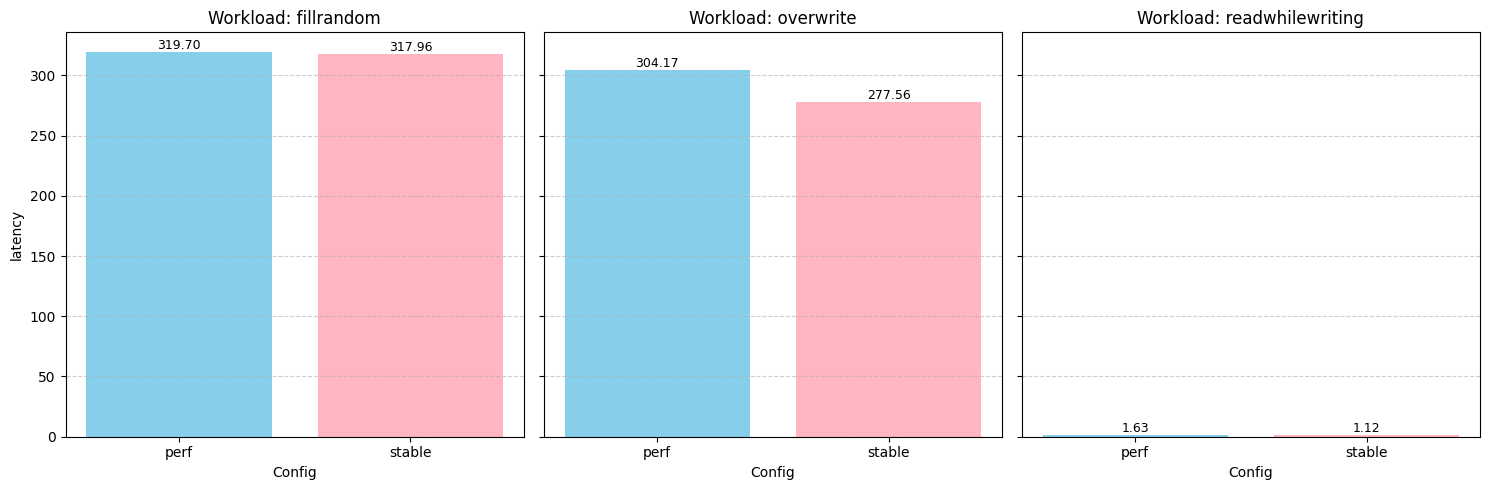

In [6]:
plot_graph(universal, target_column='latency')

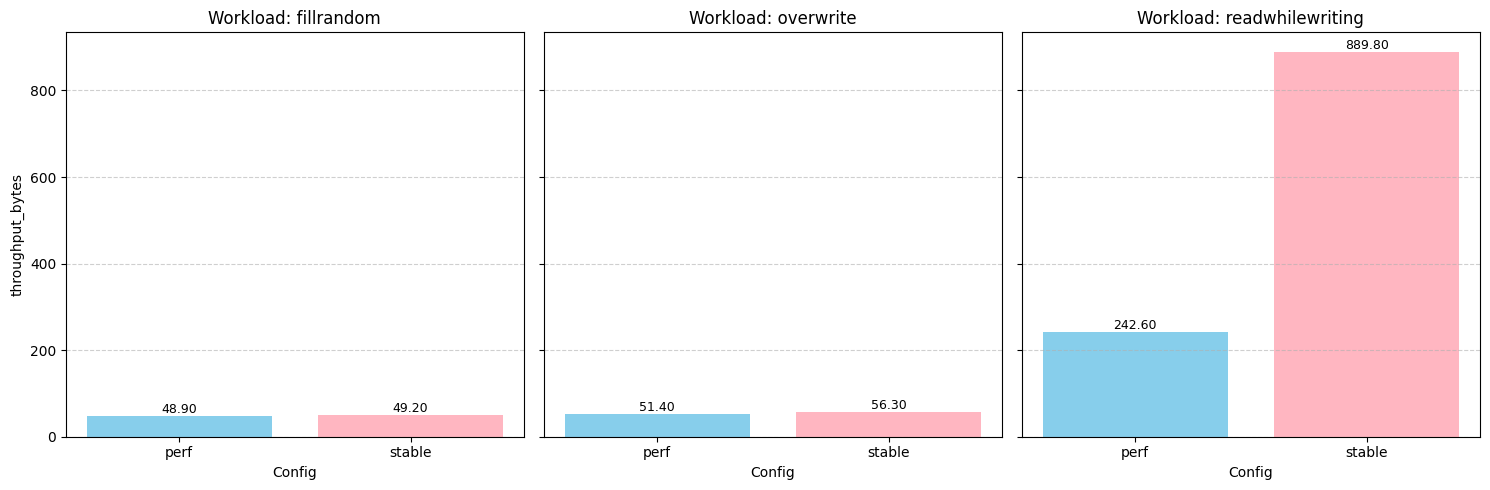

In [7]:
plot_graph(universal, target_column='throughput_bytes')

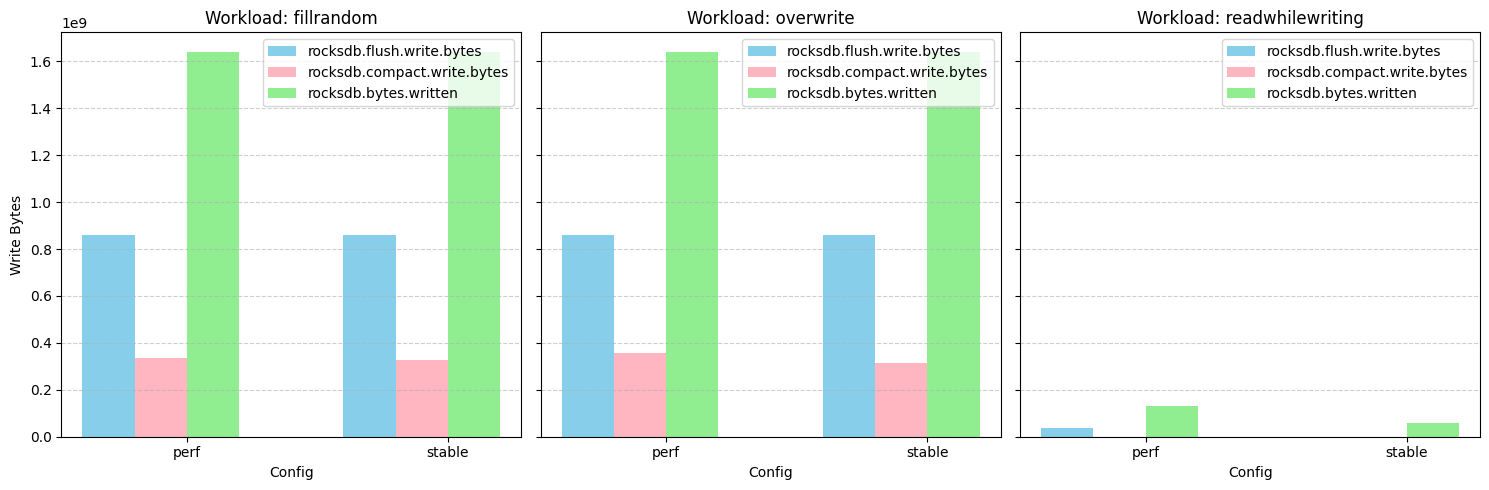

In [8]:
plot_graph2(universal)

## Leveled

In [9]:
leveled = df[df['compaction_style'] == 'leveled']
leveled

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
0,fillrandom,leveled,perf,100000,1641700000,198908928,822552660,0,0,NaN,0.622197,227.390,4397.0,68.8
2,fillrandom,leveled,stable,100000,1641700000,197796352,822624340,1641700000,100000,NaN,0.621563,220.143,4542.0,71.0
12,overwrite,leveled,stable,100000,1641700000,190411776,822870100,1641700000,100000,NaN,0.617215,243.890,4100.0,64.1
15,readwhilewriting,leveled,perf,8035,131910595,0,35746949,0,0,NaN,0.270994,1.572,348016.0,222.2
16,readwhilewriting,leveled,stable,3629,59577293,0,0,59577293,3629,NaN,0.000000,1.144,3489122.0,861.6
17,overwrite,leveled,perf,100000,1641700000,221537792,822506068,0,0,NaN,0.635953,254.548,3928.0,61.4


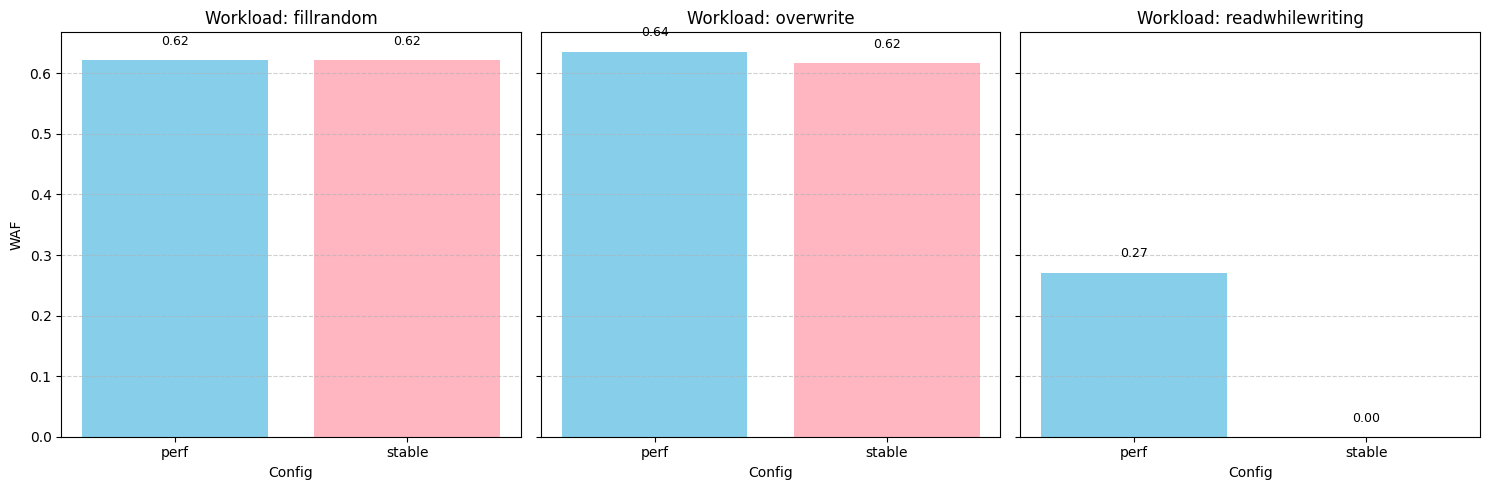

In [10]:
plot_graph(leveled)

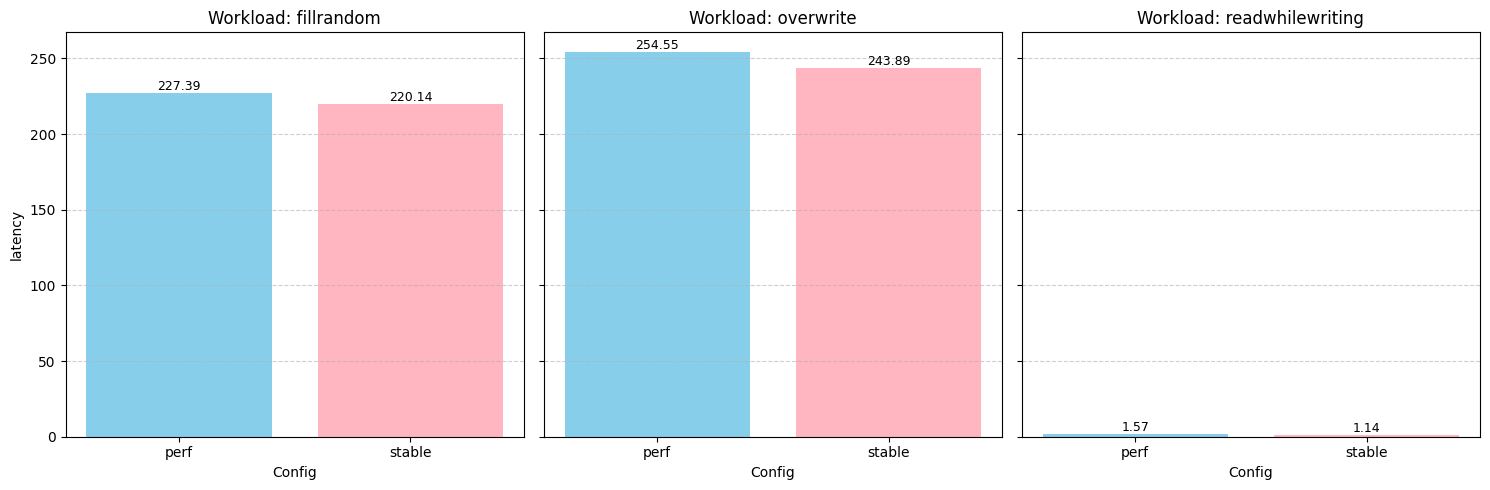

In [11]:
plot_graph(leveled, target_column='latency')

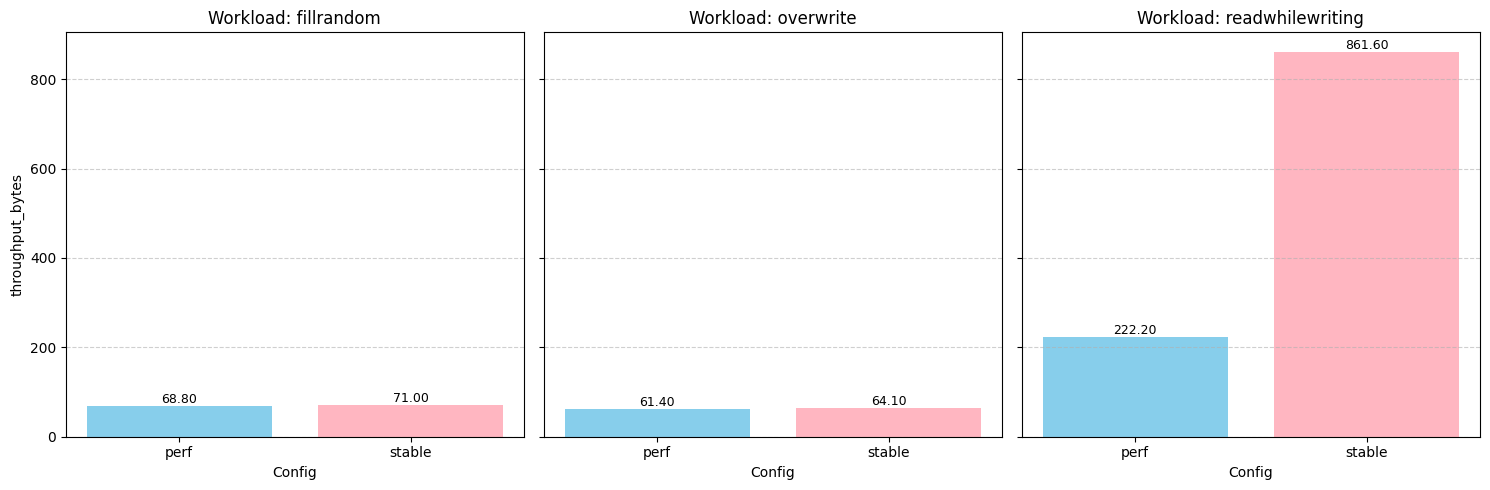

In [12]:
plot_graph(leveled, target_column='throughput_bytes')

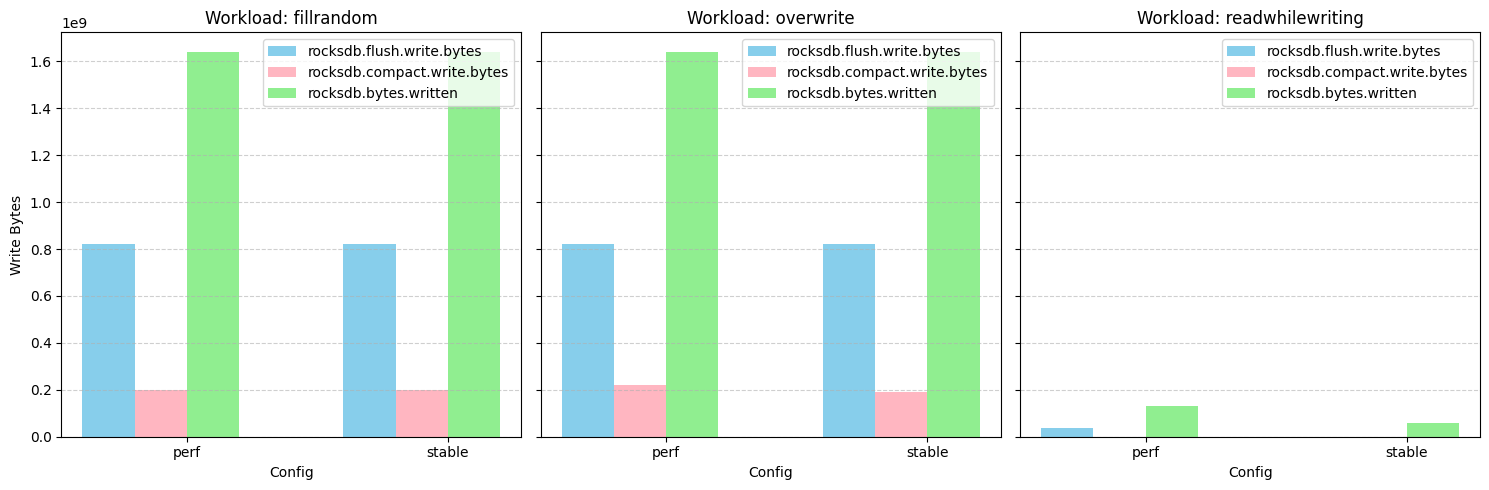

In [13]:
plot_graph2(leveled)

## FIFO

In [14]:
fifo = df[df['compaction_style'] == 'fifo']
fifo

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.write.raw.input.bytes,WAF,latency,throughput_ops,throughput_bytes
1,overwrite,fifo,stable,100000,1641700000,0,822842964,1641700000,100000,NaN,0.501214,168.393,5938.0,92.9
3,fillrandom,fifo,perf,100000,1641700000,0,821753428,0,0,NaN,0.500550,140.064,7139.0,111.7
6,overwrite,fifo,perf,100000,1641700000,0,822334036,0,0,NaN,0.500904,144.786,6906.0,108.0
7,readwhilewriting,fifo,stable,3416,56080472,0,0,56080472,3416,NaN,0.000000,1.096,3645510.0,866.0
13,fillrandom,fifo,stable,100000,1641700000,0,822660180,1641700000,100000,NaN,0.501103,153.428,6517.0,101.9
14,readwhilewriting,fifo,perf,8035,131910595,0,35801733,0,0,NaN,0.271409,1.626,396884.0,254.6


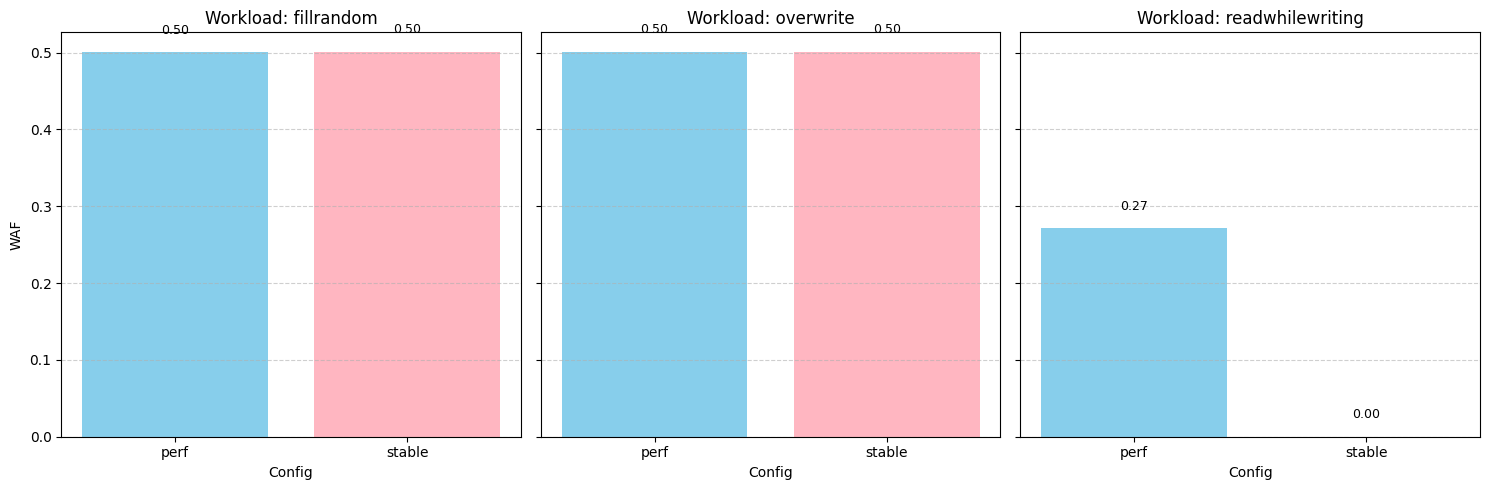

In [15]:
plot_graph(fifo)

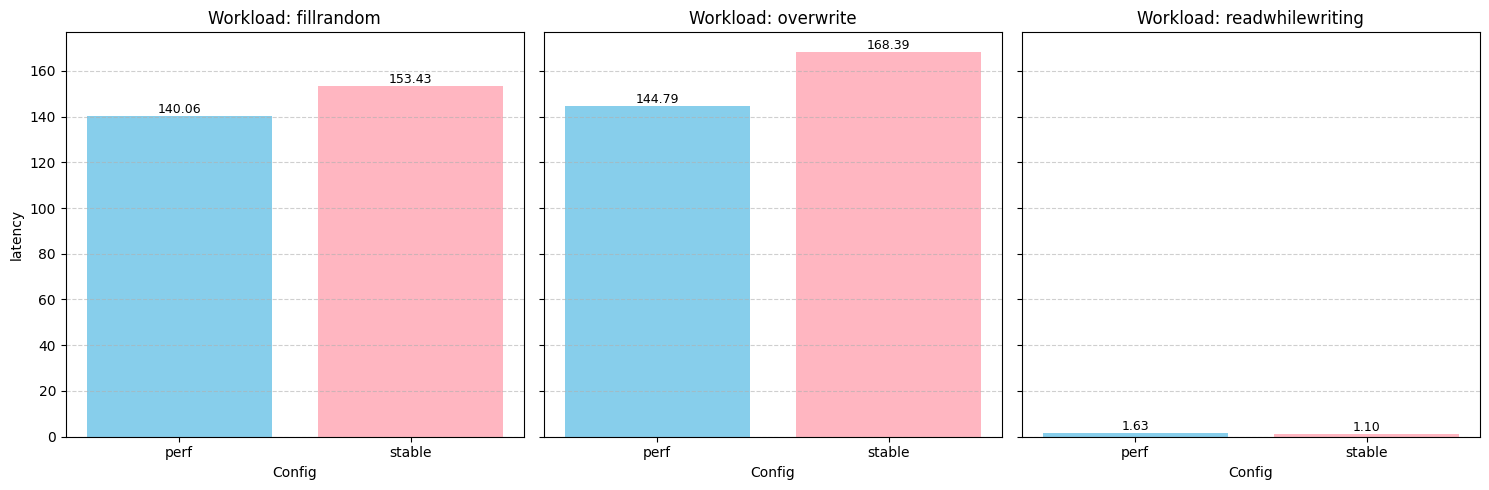

In [16]:
plot_graph(fifo, target_column='latency')

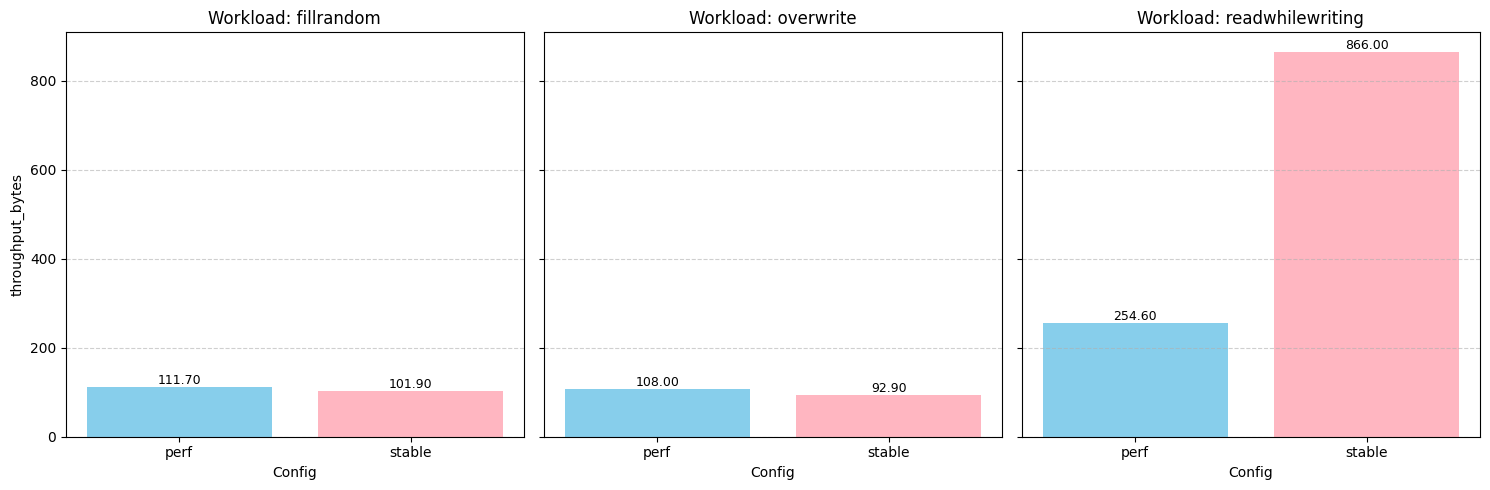

In [17]:
plot_graph(fifo, target_column='throughput_bytes')

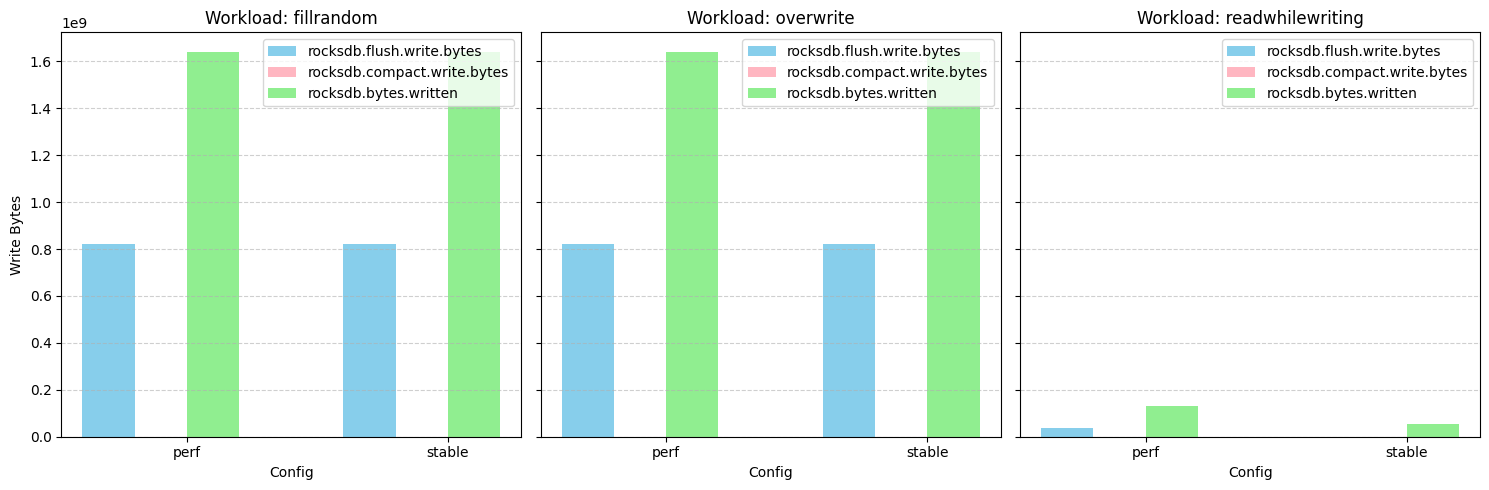

In [18]:
plot_graph2(fifo)